In [2]:
import altair as alt
import pandas as pd

In [3]:
df = pd.read_csv("/Users/jlhudd/projects/dms-view/docs/_data/2009-age-65-per-site-data.csv")

In [4]:
df.head()

,site,isite,pdb_chain,pdb_site,wildtype,mutation,mutdiffsel
0,193,208,A,193,F,D,3.0309
1,193,208,A,193,F,S,2.6853
2,193,208,A,193,F,A,2.2859
3,193,208,A,193,F,N,1.4312
4,193,208,A,193,F,G,1.3711


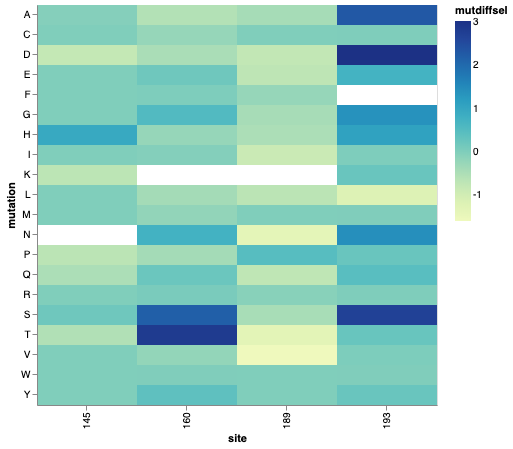

In [9]:
alt.Chart(df).mark_rect().encode(
    x="site:O",
    y="mutation:N",
    color="mutdiffsel:Q",
    tooltip=["wildtype:N", "mutation:N", "mutdiffsel:Q"]
).properties(
    width=400,
    height=400
)

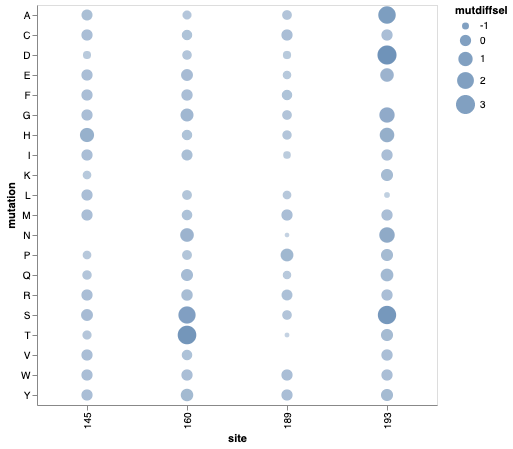

In [15]:
alt.Chart(df).mark_circle().encode(
    x="site:O",
    y="mutation:N",
    size="mutdiffsel:Q",
    opacity="mutdiffsel:Q",
    tooltip=["wildtype:N", "mutation:N", "mutdiffsel:Q"]
).properties(
    width=400,
    height=400
)

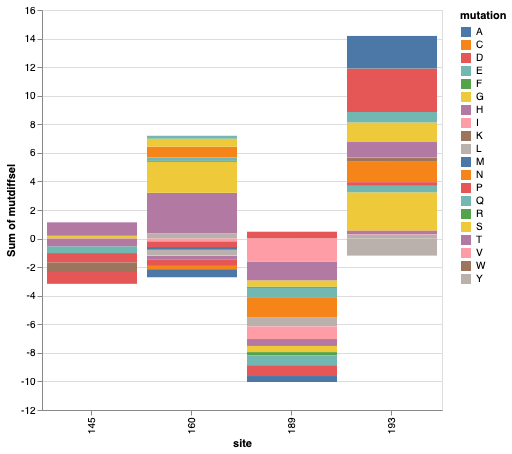

In [12]:
alt.Chart(df).mark_bar().encode(
    x="site:O",
    y="sum(mutdiffsel)",
    color="mutation:N",
    tooltip=["site:O", "wildtype:N", "mutation:N", "mutdiffsel:Q"]
).properties(
    width=400,
    height=400
)

In [19]:
df = pd.read_csv("/Users/jlhudd/projects/dms-view/docs/avg_sel_tidy.csv")

In [22]:
df = df.query("serum_name_formatted == '2009-age-65'").copy()

In [33]:
sites = df.loc[:, ["site", "abs_diffsel"]].drop_duplicates().sort_values("abs_diffsel", ascending=False).head(10)["site"].values

In [34]:
subset_df = df[df["site"].isin(sites)].copy()

In [35]:
subset_df.shape

(200, 17)

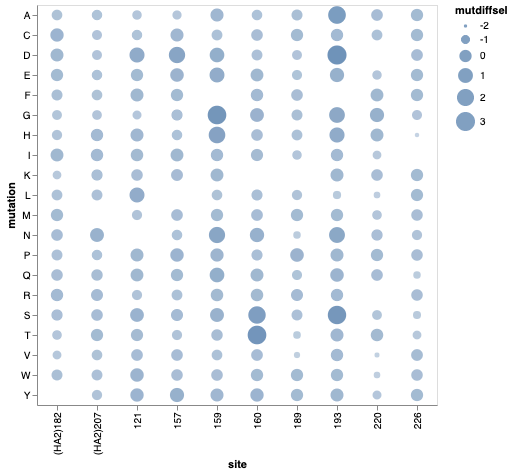

In [36]:
alt.Chart(subset_df).mark_circle().encode(
    x="site:O",
    y="mutation:N",
    size="mutdiffsel:Q",
    opacity="mutdiffsel:Q",
    tooltip=["wildtype:N", "mutation:N", "mutdiffsel:Q"]
).properties(
    width=400,
    height=400
)